<a href="https://colab.research.google.com/github/dani-s-h007/bird-model/blob/main/birdmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fastai duckduckgo_search fastdownload

  Using cached duckduckgo_search-8.0.4-py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 6.7 MB/s eta 0:00:00
Using cached duckduckgo_search-8.0.4-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s e

In [1]:
import socket
try:
    socket.create_connection(("duckduckgo.com", 80))
    print("Internet works")
except OSError:
    print("No internet access")


Internet works


In [2]:
from duckduckgo_search import DDGS
from fastcore.all import L
import time

def safe_search_images(keywords, max_images=10, retries=3):
    for i in range(retries):
        try:
            return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
        except Exception as e:
            print(f"Attempt {i+1} failed: {e}")
            time.sleep(3)
    raise Exception("All image search attempts failed.")


In [3]:
import socket, warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet.")


In [4]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai


In [5]:
!pip install -Uqq duckduckgo_search

In [6]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [7]:
urls = search_images('bird photos', max_images=1)
urls[0]


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

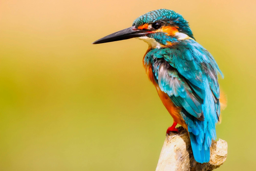

In [8]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


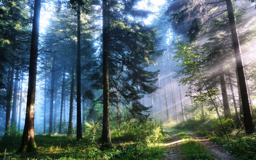

In [9]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)


In [14]:
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep
from pathlib import Path

searches = ['forest', 'bird']
path = Path('bird_or_not')

def safe_download_images(dest, query, delay=15):
    try:
        urls = search_images(query)
        download_images(dest, urls=urls)
        print(f"Downloaded: {query} to {dest}")
    except Exception as e:
        print(f"Failed to download for '{query}': {e}")
    sleep(delay)

for o in searches:
    dest = path / o
    dest.mkdir(exist_ok=True, parents=True)
    safe_download_images(dest, f'{o} photo')
    safe_download_images(dest, f'{o} sun photo')
    safe_download_images(dest, f'{o} shade photo')
    try:
        resize_images(dest, max_size=400, dest=dest)
        print(f"Resized images in {dest}")
    except Exception as e:
        print(f"Resize failed for {dest}: {e}")


Failed to download for 'forest photo': https://duckduckgo.com/i.js?o=json&q=forest+photo&l=wt-wt&vqd=4-209049581317016528927069152973299983527&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit
Failed to download for 'forest sun photo': https://duckduckgo.com/i.js?o=json&q=forest+sun+photo&l=wt-wt&vqd=4-123305494753021791422587837572737730&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit
Downloaded: forest shade photo to bird_or_not/forest


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Resized images in bird_or_not/forest
Downloaded: bird photo to bird_or_not/bird
Downloaded: bird sun photo to bird_or_not/bird
Downloaded: bird shade photo to bird_or_not/bird


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Resized images in bird_or_not/bird


In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


37

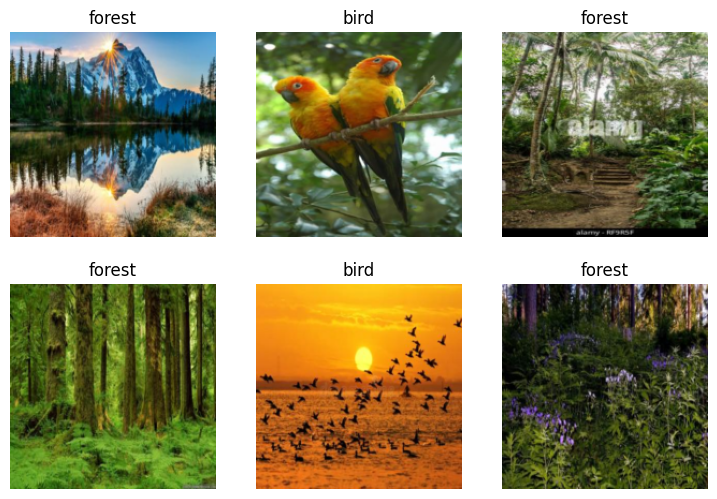

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)


In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.freeze()
learn.fit_one_cycle(1)

learn.unfreeze()
learn.fit_one_cycle(2, lr_max=1e-3)


epoch,train_loss,valid_loss,error_rate,time
0,0.491599,0.176930,0.052632,04:21


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e06354e7740>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
Exception ignored in:     self._shutdown_workers()
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e06354e7740>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__

     self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      if w.is_alive(): 
       ^ ^ ^ ^^^^^^^^^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^
    assert self._parent_pid == os.getpid(), 'can only test a child process'^
^ ^ ^ ^^  ^ ^^  ^^ 
  ^  File "/us

epoch,train_loss,valid_loss,error_rate,time
0,0.233848,5.033299,0.473684,05:56
1,0.209560,0.094880,0.030075,05:49


In [26]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")


This is a: bird.
Probability it's a bird: 1.0000
